TASK 2: Image classification using deep learning

Objective: To train a neural network that classifies satelite images with or without coffee plantains

In [15]:
!pip install keras
!pip install tensorflow

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.metrics import confusion_matrix, roc_auc_score,accuracy_score
import matplotlib
import matplotlib.pylab as plt

In [5]:
#Keras and tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [6]:
# Read-in the data
X = np.loadtxt('https://raw.githubusercontent.com/onefishy/Rwanda-course-2020/master/Competition_data/X_train.txt')
y = np.loadtxt('https://raw.githubusercontent.com/onefishy/Rwanda-course-2020/master/Competition_data/y_train.txt')

# Reshape the X's to have the correct dimensionality
X = X.reshape(X.shape[0], 20, 20)

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=101)

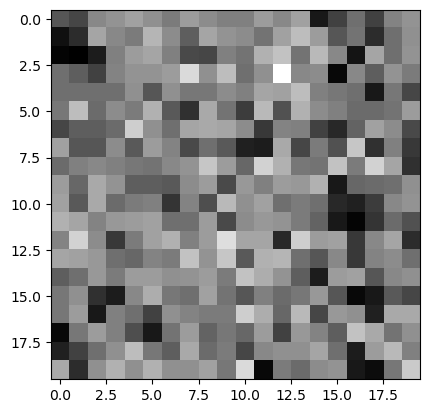

In [7]:
# Visualize some example image
image_number = 4
plt.imshow(X[image_number], cmap='gray')
plt.show()

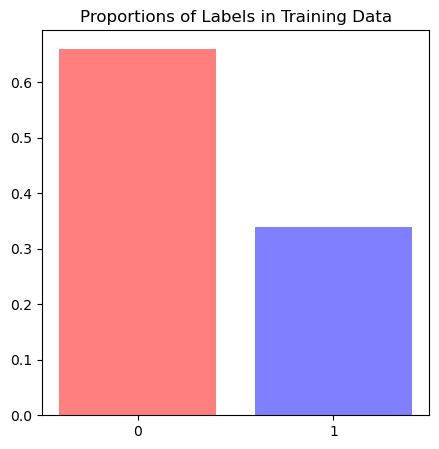

In [8]:
# Visualizing proportions of labels in the training data
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
percent_0 = len(y_train[y_train == 0]) * 1. / len(y_train)
percent_1 = len(y_train[y_train == 1]) * 1. / len(y_train)
ax.bar((0, 1), (percent_0, percent_1), color=['red', 'blue'], alpha=0.5, align='center')
ax.set_xticks([0, 1])
ax.set_title('Proportions of Labels in Training Data')
plt.show()

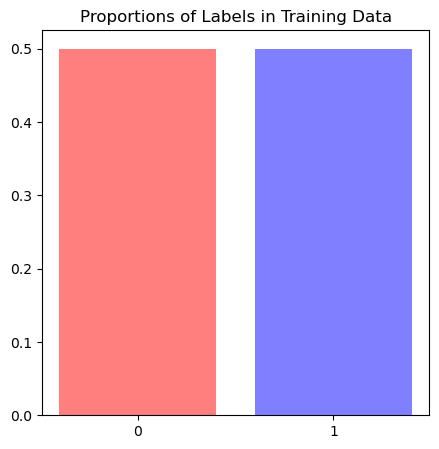

In [9]:
#Resampling the minority group and then plot it
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
num_samples, num_rows, num_columns = X_train.shape
X_train_2d = X_train.reshape((num_samples, num_rows * num_columns))

X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_2d, y_train)
X_train_resampled = X_train_resampled.reshape((-1, num_rows, num_columns))


fig, ax = plt.subplots(1, 1, figsize=(5, 5))
percent_01 = len(y_train_resampled[y_train_resampled == 0]) * 1. / len(y_train_resampled)
percent_11 = len(y_train_resampled[y_train_resampled == 1]) * 1. / len(y_train_resampled)
ax.bar((0, 1), (percent_01, percent_11), color=['red', 'blue'], alpha=0.5, align='center')
ax.set_xticks([0, 1])
ax.set_title('Proportions of Labels in Training Data')
plt.show()

In [13]:
#Initiating, training and evaluating neural network
neural_network = Sequential()

hidden_nodes1 = 10 
hidden_nodes2 = 20
hidden_nodes3 = 5
neural_network.add(Dense(hidden_nodes1, input_shape=(X_train.shape[-2] * X_train.shape[-1],), activation='relu')) # Input layer
neural_network.add(Dense(hidden_nodes2, activation='relu'))
neural_network.add(Dense(hidden_nodes2, activation='relu')) 
neural_network.add(Dense(hidden_nodes2, activation='relu')) 
neural_network.add(Dense(hidden_nodes2, activation='relu')) 
neural_network.add(Dense(hidden_nodes2, activation='relu'))    
neural_network.add(Dense(1, activation='sigmoid'))                        

learning_rate = 0.005
neural_network.compile(optimizer=SGD(lr=learning_rate, ), loss='binary_crossentropy', metrics=['accuracy'])

batch_size = 100 
epochs = 1000
history = neural_network.fit(X_train_resampled.reshape((X_train_resampled.shape[0], -1)), y_train_resampled, batch_size=150, shuffle=True, epochs=epochs, verbose=0)

y_train_pred = neural_network.predict(X_train_resampled.reshape(X_train_resampled.shape[0], -1))
y_train_pred = (y_train_pred >= 0.5) * 1.0
print('Accuracy score on Training Data:', accuracy_score(y_train_resampled, y_train_pred))

y_test_pred = neural_network.predict(X_test.reshape(X_test.shape[0], -1))
y_test_pred = (y_test_pred >= 0.5) * 1.0
print('Accuracy score on Testing Data: ', accuracy_score(y_test, y_test_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))

print('\nAUC Score:', roc_auc_score(y_test, y_test_pred))


40/40 [==============================] - 0s 2ms/step
Accuracy score on Training Data: 0.7747252747252747
15/15 [==============================] - 0s 988us/step
Accuracy score on Testing Data:  0.634453781512605
Confusion Matrix:
[[263  60]
 [114  39]]

AUC Score: 0.5345717234262126


Insights:

1. Looking at the confusion matrix, the model is doing well on classifying images with coffee plantaints more than it is predicting images without plantains.
2. The model is slightly overfitting, reflecting on a higher accuracy score on training set, than the one on testing set.

Conclusion: The model requires more training with more data. The minority group of images with plantains was significantly low, thus making the resampling misleading. However, resampling just had to be performed to avoid training bias.